In [1]:
#import the libraries 
from database import host
from database import port
from database import username
from database import password
from database import db
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

In [2]:
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}/{db}")

In [3]:
salary_table=pd.read_sql("SELECT * FROM salary",engine)

In [4]:
salary_table.head(5)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [5]:
salary= salary_table['salary']


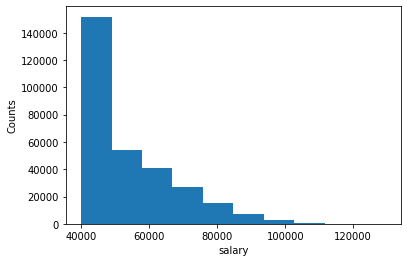

In [6]:
import matplotlib.pyplot as plt
plt.hist(salary)
plt.xlabel('salary')
plt.ylabel('Counts')
plt.show()

In [23]:
title_table=pd.read_sql("SELECT * FROM title",engine)

In [24]:
table_merge=pd.merge(salary_table,title_table, on= 'emp_no',how= 'outer')
table_merge = table_merge[['title','salary']]
#table_merge = table_merge.set_index('title')
table_merge

,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054
...,...,...
443303,Engineer,49597
443304,Senior Engineer,49597
443305,Senior Staff,40000
443306,Staff,40000


In [25]:
plot_salary=table_merge.groupby('title')['salary'].mean()
plot_salary

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

In [27]:
sal_df=pd.DataFrame({'salary':plot_salary})
sal_df

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


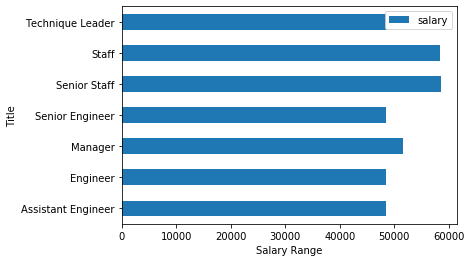

In [33]:
sal_df.plot.barh()
plt.xlabel('Salary Range')
plt.ylabel('Title')
plt.legend()
plt.show()